In [23]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
def rgb_dct_mean(image_path, img_size):
    images = glob.glob(image_path)
    dct_sum = np.zeros((img_size), dtype=np.float32)

    for image_file in tqdm(images):
        # 이미지 불러오기
        image = cv2.imread(image_file)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 2D-DCT 변환
        dct = np.zeros_like(image_rgb, dtype=np.float32)
        for channel in range(3):
            dct[:, :, channel] = cv2.dct(image_rgb[:, :, channel].astype(np.float32))

        # DCT 이미지의 평균 누적 계산
        dct_sum += dct

    # DCT 이미지의 평균 계산
    dct_mean = dct_sum / len(images)

    return dct_mean


In [19]:
def gray_dct_mean(image_path, img_size):
    images = glob.glob(image_path)
    dct_sum = np.zeros((img_size), dtype=np.float32)

    for image_file in tqdm(images):
        # 이미지 불러오기
        image = cv2.imread(image_file)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # 2D-DCT 변환
        dct = cv2.dct(image_gray.astype(np.float32))

        # DCT 이미지의 평균 누적 계산
        dct_sum += dct

    # DCT 이미지의 평균 계산
    dct_mean = dct_sum / len(images)

    return dct_mean

In [24]:
def rgb_fft_mean(image_path, img_size):
    images = glob.glob(image_path)
    fft_sum = np.zeros((img_size), dtype=np.float32)

    for image_file in tqdm(images):
        # Load image
        image = cv2.imread(image_file)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform FFT on each channel
        fft = np.zeros_like(image_rgb, dtype=np.float32)
        for channel in range(3):
            fft_channel = np.fft.fft2(image_rgb[:, :, channel])
            fft_channel_magnitude = np.abs(fft_channel)
            fft[:, :, channel] = np.log(fft_channel_magnitude + 1)  # use log scale for better visualization

        # Accumulate FFT images' mean
        fft_sum += fft

    # Calculate mean FFT image
    fft_mean = fft_sum / len(images)

    return fft_mean


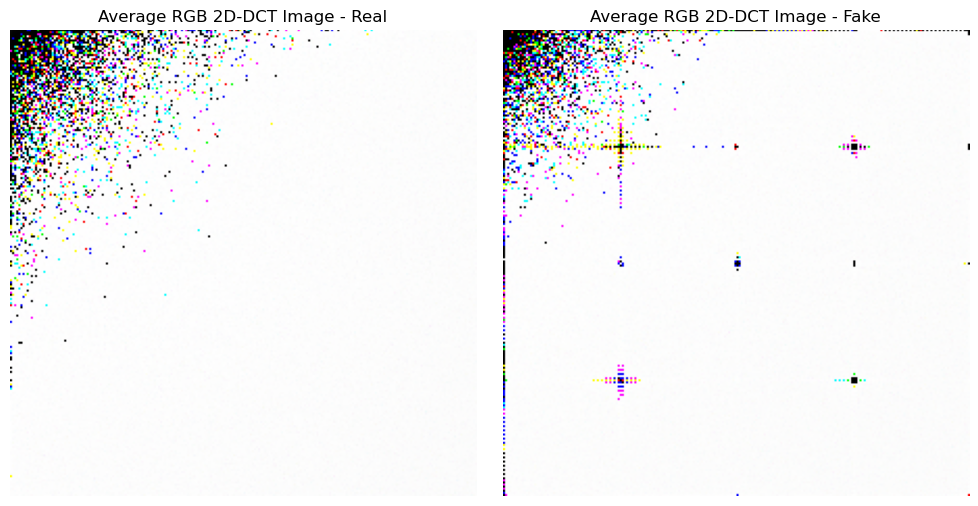

In [21]:
# 이미지 경로 설정
real_image_path = r'D:\Projects\AIM\Competition\2023\AIConnect_AI_Image_Recognition\data\patched\train\real_images\*.png'
fake_image_path = r'D:\Projects\AIM\Competition\2023\AIConnect_AI_Image_Recognition\data\patched\train\fake_images\*.png'

# DCT 이미지의 평균 계산 - Real Images
dct_mean_real = rgb_dct_mean(real_image_path, (224, 224, 3))

# DCT 이미지의 평균 계산 - Fake Images
dct_mean_fake = rgb_dct_mean(fake_image_path, (224, 224, 3))

# 변환된 데이터 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(dct_mean_real)).astype(np.uint8))
plt.title('Average RGB 2D-DCT Image - Real')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(dct_mean_fake)).astype(np.uint8))
plt.title('Average RGB 2D-DCT Image - Fake')
plt.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 59330/59330 [02:04<00:00, 475.63it/s]


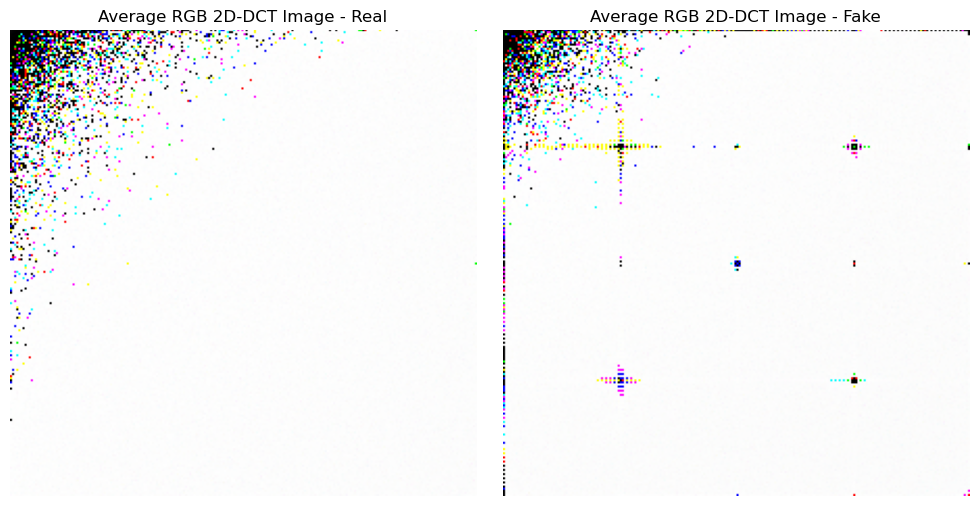

In [22]:
# 이미지 경로 설정
real_image_path = r'D:\Projects\AIM\Competition\2023\AIConnect_AI_Image_Recognition\external_data\external_patched_224x224\train\real_images\*.png'
fake_image_path = r'D:\Projects\AIM\Competition\2023\AIConnect_AI_Image_Recognition\external_data\external_patched_224x224\train\fake_images\*.png'

# DCT 이미지의 평균 계산 - Real Images
dct_mean_real = rgb_dct_mean(real_image_path, (224, 224, 3))

# # DCT 이미지의 평균 계산 - Fake Images
dct_mean_fake = rgb_dct_mean(fake_image_path, (224, 224, 3))

# 변환된 데이터 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(dct_mean_real)).astype(np.uint8))
plt.title('Average RGB 2D-DCT Image - Real')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(dct_mean_fake)).astype(np.uint8))
plt.title('Average RGB 2D-DCT Image - Fake')
plt.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 55379/55379 [05:08<00:00, 179.49it/s]


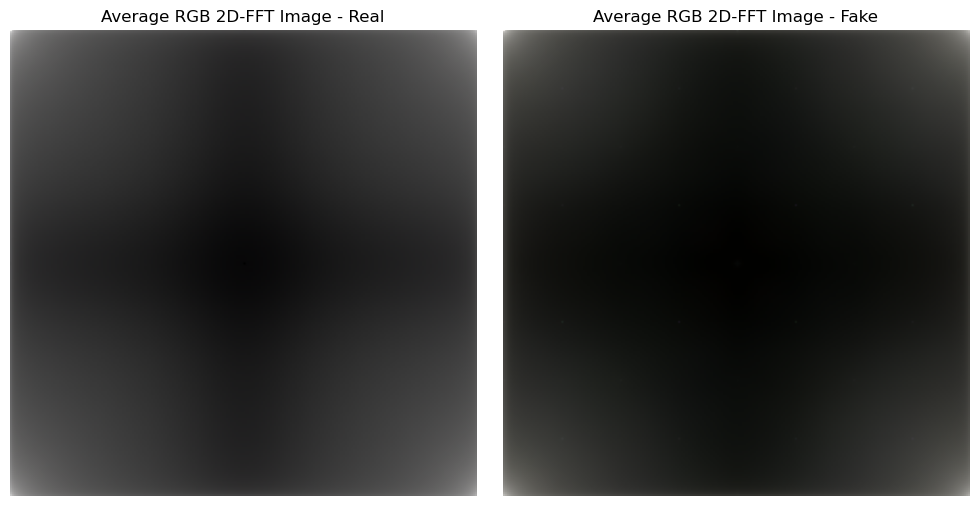

: 

In [25]:
# Set image paths
real_image_path = r'D:\Projects\AIM\Competition\2023\AIConnect_AI_Image_Recognition\original_data\patched_224x224\train\real_images\*.png'
fake_image_path = r'D:\Projects\AIM\Competition\2023\AIConnect_AI_Image_Recognition\original_data\patched_224x224\train\fake_images\*.png'

# Calculate mean FFT image - Real Images
fft_mean_real = rgb_fft_mean(real_image_path, (224, 224, 3))

# Calculate mean FFT image - Fake Images
fft_mean_fake = rgb_fft_mean(fake_image_path, (224, 224, 3))

# Check the transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.normalize(fft_mean_real, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8))
plt.title('Average RGB 2D-FFT Image - Real')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.normalize(fft_mean_fake, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8))
plt.title('Average RGB 2D-FFT Image - Fake')
plt.axis('off')

plt.tight_layout()
plt.show()